### Zadanie
Utwórz mapę statyczną ilustrującą zmiany w gęstości zaludnienia w Europie w latach 2014-2017.

1. Wczytaj dane z plików countries.geojson i population_density.geojson.

In [140]:
import geopandas as gpd

countries = gpd.read_file('countries.geojson')
population_density = gpd.read_file('population_density.geojson')

print(countries.head())
print(population_density.head())


   id                 CNTR_NAME ISO3_CODE CNTR_ID             NAME_ENGL FID  \
0  AD                   Andorra       AND      AD               Andorra  AD   
1  AE  الإمارات العربية المتحدة       ARE      AE  United Arab Emirates  AE   
2  AF       افغانستان-افغانستان       AFG      AF           Afghanistan  AF   
3  AG       Antigua and Barbuda       ATG      AG   Antigua and Barbuda  AG   
4  AI                  Anguilla       AIA      AI              Anguilla  AI   

                                            geometry  
0  POLYGON ((1.7258 42.5044, 1.70158 42.49156, 1....  
1  MULTIPOLYGON (((56.26584 25.62472, 56.2831 25....  
2  POLYGON ((60.87297 29.85847, 60.94185 29.93084...  
3  MULTIPOLYGON (((-61.90277 17.10078, -61.89754 ...  
4  MULTIPOLYGON (((-63.16714 18.16338, -63.16128 ...  
     id CNTR_CODE       NUTS_NAME  LEVL_CODE   FID NUTS_ID PopDen_UNIT  \
0  DE24        DE     Oberfranken          2  DE24    DE24     HAB_KM2   
1  NO03        NO   Sør-Østlandet          2  N

2. Przeprowadź projekcję danych na EPSG:3857

In [141]:
countries = countries.to_crs(epsg=3857)
population_density = population_density.to_crs(epsg=3857)

3. Oblicz procentową zmianę gęstości zaludnienia między rokiem 2014 a rokiem 2017.

In [142]:
population_density['density_change'] = ((population_density['PopDen_PD2017'] - population_density['PopDen_PD2014']) 
                                        / population_density['PopDen_PD2014']) * 100

print(population_density.head())

     id CNTR_CODE       NUTS_NAME  LEVL_CODE   FID NUTS_ID PopDen_UNIT  \
0  DE24        DE     Oberfranken          2  DE24    DE24     HAB_KM2   
1  NO03        NO   Sør-Østlandet          2  NO03    NO03     HAB_KM2   
2  HU11        HU        Budapest          2  HU11    HU11     HAB_KM2   
3  HU12        HU            Pest          2  HU12    HU12     HAB_KM2   
4  HU21        HU  Közép-Dunántúl          2  HU21    HU21     HAB_KM2   

   PopDen_PD2014  PopDen_PD2015  PopDen_PD2016  PopDen_PD2017  \
0          146.3          146.6          147.0          147.5   
1           28.9           29.1           28.9           29.1   
2         3433.6         3448.1         3443.2         3433.8   
3          194.8          195.9          197.6          199.7   
4           99.8           99.4           99.0           98.8   

                                            geometry  density_change  
0  POLYGON ((1278122.956 6521363.261, 1278270.381...        0.820232  
1  MULTIPOLYGON (((118

4. Przeprowadź klasyfikację procentowej zmiany gęstości zaludnienia na przedziały o wartościach -5, 0, 5, 10.

In [143]:
import mapclassify

classifier = mapclassify.UserDefined.make(bins = [-5, 0, 5, 10])

population_density['density_change_cat'] = population_density[['density_change']].apply(classifier)

print(population_density)

       id CNTR_CODE              NUTS_NAME  LEVL_CODE   FID NUTS_ID  \
0    DE24        DE            Oberfranken          2  DE24    DE24   
1    NO03        NO          Sør-Østlandet          2  NO03    NO03   
2    HU11        HU               Budapest          2  HU11    HU11   
3    HU12        HU                   Pest          2  HU12    HU12   
4    HU21        HU         Közép-Dunántúl          2  HU21    HU21   
..    ...       ...                    ...        ...   ...     ...   
322  SE22        SE             Sydsverige          2  SE22    SE22   
323  UKM7        UK       Eastern Scotland          2  UKM7    UKM7   
324  UKM8        UK  West Central Scotland          2  UKM8    UKM8   
325  UKM9        UK      Southern Scotland          2  UKM9    UKM9   
326  UKN0        UK       Northern Ireland          2  UKN0    UKN0   

    PopDen_UNIT  PopDen_PD2014  PopDen_PD2015  PopDen_PD2016  PopDen_PD2017  \
0       HAB_KM2          146.3          146.6          147.0        

5. Na mapie zamieść dane dotyczące krajów i gęstości zaludnienia (wykorzystując rezultaty klasyfikacji).

<Axes: >

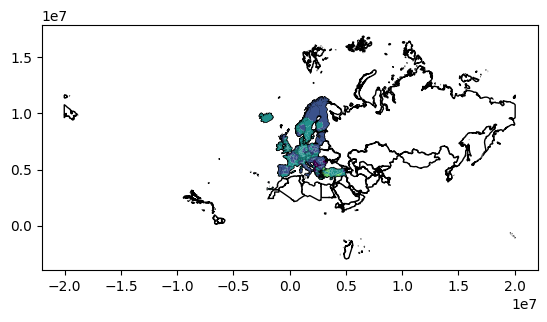

In [144]:
import matplotlib.pyplot as plt

ax = countries.plot(facecolor='white', edgecolor='black')
population_density.plot(ax=ax, column='density_change_cat')

6. Dobierz mapę kolorów.

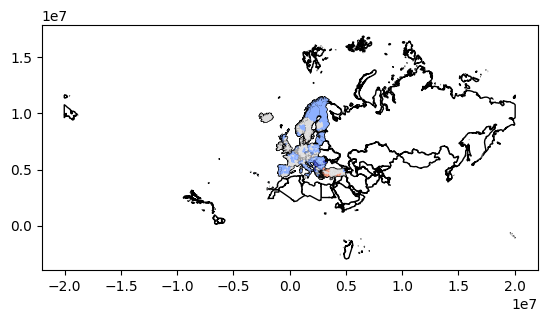

In [145]:
selected_color_map = 'coolwarm'

ax = countries.plot(facecolor='white', edgecolor='black')
population_density.plot(ax=ax, column='density_change_cat', cmap=selected_color_map)

plt.show()

7. Dopasuj współrzędne geograficzne tak, aby mapa prezentowała przede wszystkim kraje europejskie.

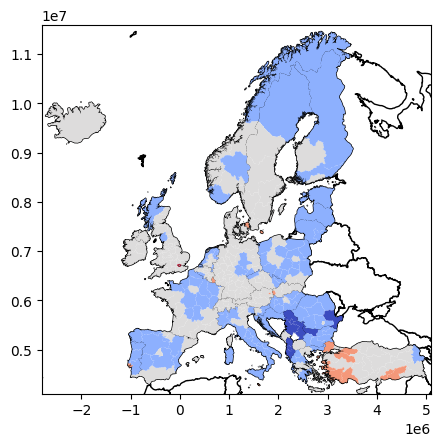

In [146]:
ax = countries.plot(facecolor='white', edgecolor='black')
population_density.plot(ax=ax, column='density_change_cat', cmap=selected_color_map)
ax.set_xlim([-2800000, 5100000])
ax.set_ylim([4100000, 11600000])

plt.show()

8. Zadbaj o czytelność i przejrzystość mapy, m.in. poprzez wyświetlenie tytułu wykresu i legendy, a także dobór kolorów pozostałych elementów.

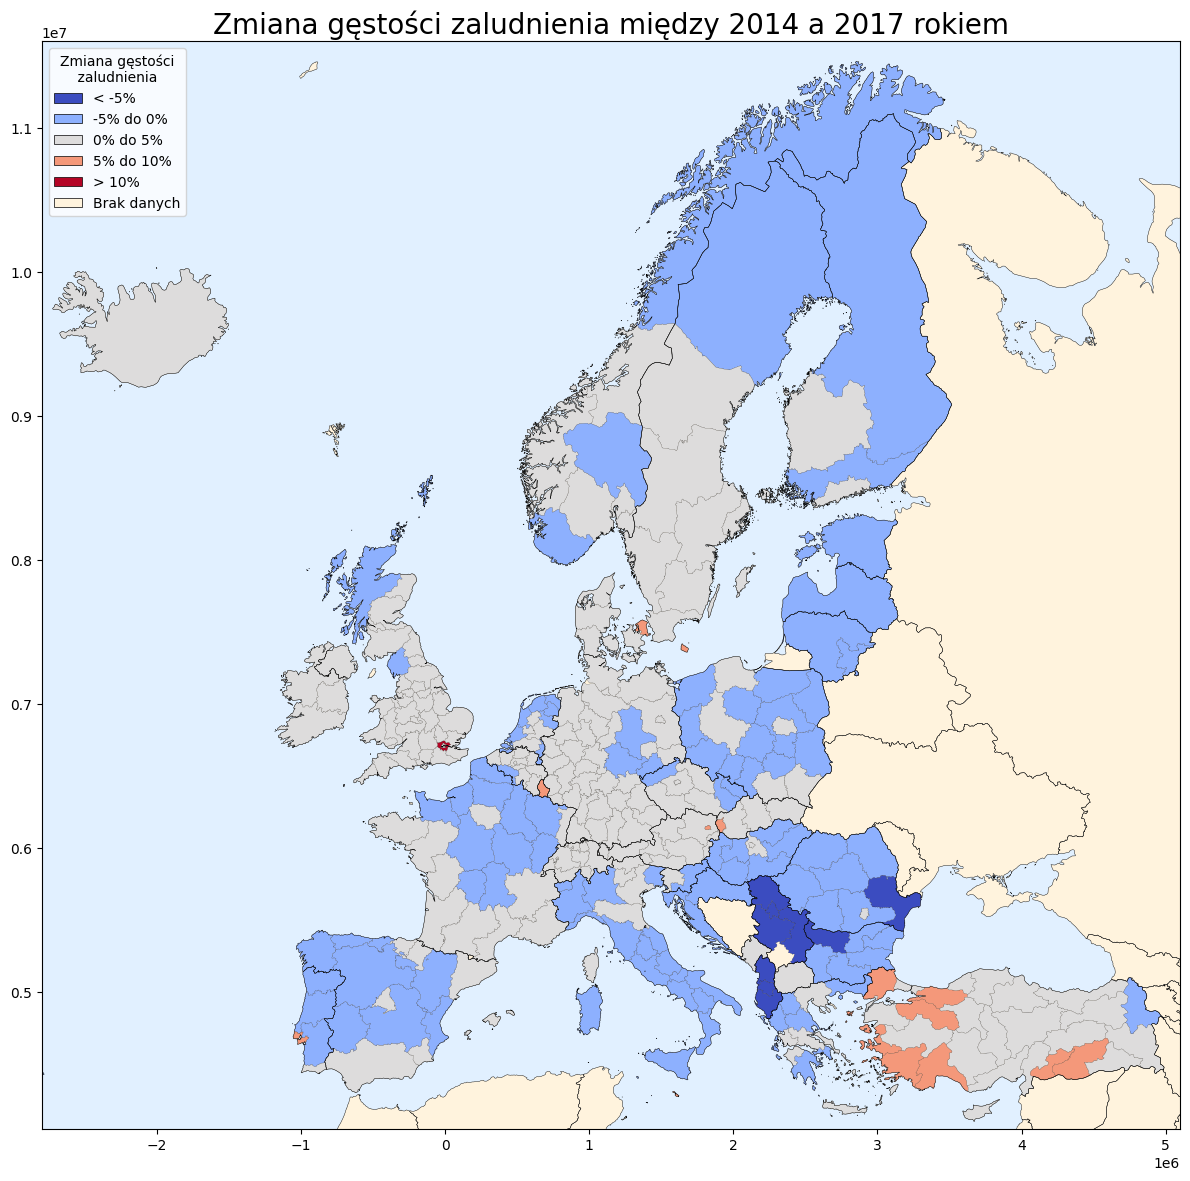

In [147]:
import matplotlib.patches as mpatches


category_labels = {
    0: '< -5%',
    1: '-5% do 0%',
    2: '0% do 5%',
    3: '5% do 10%',
    4: '> 10%'
}

ax = countries.plot(figsize=(12,12), facecolor='#fff3dd', edgecolor='black', label='Brak danych', legend=True, linewidth=0)
population_density.plot(ax=ax, column='density_change_cat', cmap=selected_color_map, linewidth=0.1, edgecolor='black')
countries.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.3)
ax.set_xlim([-2800000, 5100000])
ax.set_ylim([4050000, 11600000])

cmap = plt.get_cmap(selected_color_map)
colors = [cmap(i / (len(category_labels) - 1)) for i in range(len(category_labels))]

handles = [mpatches.Patch(edgecolor='black', linewidth=0.5, facecolor=colors[i], label=category_labels[i]) for i in range(len(category_labels))] + [mpatches.Patch(edgecolor='black', linewidth=0.5, facecolor='#fff3dd', label='Brak danych')]
legend = ax.legend(handles=handles, title='Zmiana gęstości\n    zaludnienia', loc='upper left')



ax.title.set_text('Zmiana gęstości zaludnienia między 2014 a 2017 rokiem')
ax.title.set_fontsize(20)
ax.set_facecolor('#e1f0ff')

plt.tight_layout()
plt.show()


9. Umieść informację o źródle danych w lewym dolnym rogu wykresu ("Data source: Eurostat").

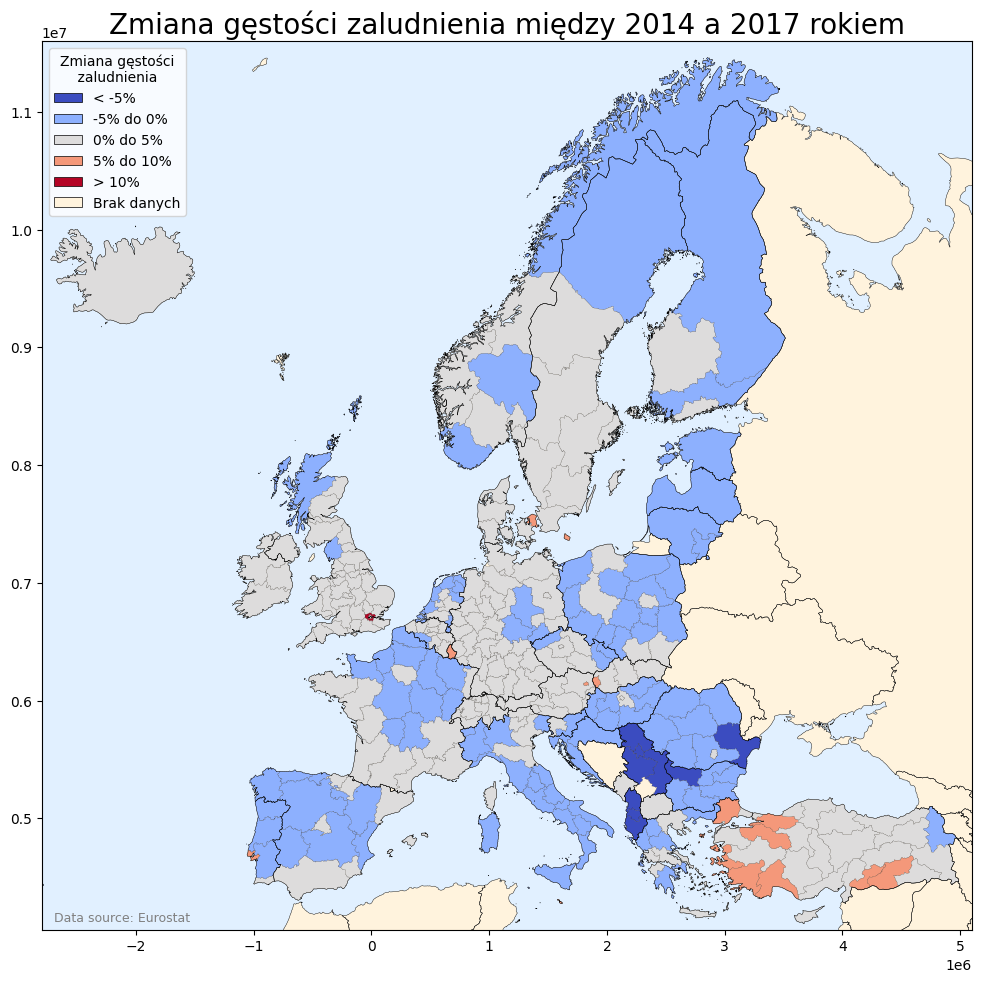

In [148]:

ax = countries.plot(figsize=(12,12), facecolor='#fff3dd', edgecolor='black', label='Brak danych', legend=True, linewidth=0)
population_density.plot(ax=ax, column='density_change_cat', cmap=selected_color_map, linewidth=0.1, edgecolor='black')
countries.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.3)
ax.set_xlim([-2800000, 5100000])
ax.set_ylim([4050000, 11600000])
cmap = plt.get_cmap(selected_color_map)
colors = [cmap(i / (len(category_labels) - 1)) for i in range(len(category_labels))]
handles = [mpatches.Patch(edgecolor='black', linewidth=0.5, facecolor=colors[i], label=category_labels[i]) for i in range(len(category_labels))] + [mpatches.Patch(edgecolor='black', linewidth=0.5, facecolor='#fff3dd', label='Brak danych')]
legend = ax.legend(handles=handles, title='Zmiana gęstości\n    zaludnienia', loc='upper left')
ax.title.set_text('Zmiana gęstości zaludnienia między 2014 a 2017 rokiem')
ax.title.set_fontsize(20)
ax.set_facecolor('#e1f0ff')

ax.text(-2700000, 4100000, 'Data source: Eurostat', fontsize=9, color='gray', ha='left', va='bottom')

plt.show()

10. Zapisz mapę do pliku w formacie PNG.

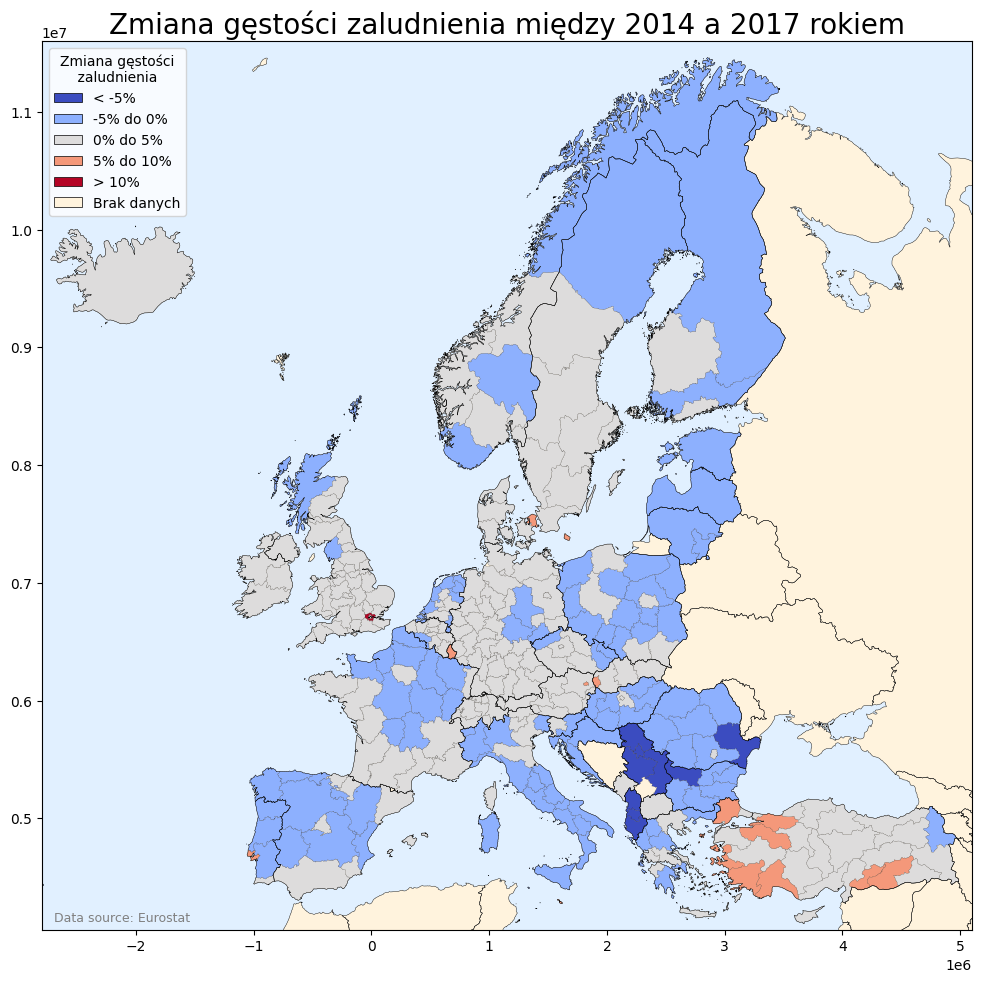

In [149]:
ax = countries.plot(figsize=(12,12), facecolor='#fff3dd', edgecolor='black', label='Brak danych', legend=True, linewidth=0)
population_density.plot(ax=ax, column='density_change_cat', cmap=selected_color_map, linewidth=0.1, edgecolor='black')
countries.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.3)
ax.set_xlim([-2800000, 5100000])
ax.set_ylim([4050000, 11600000])
cmap = plt.get_cmap(selected_color_map)
colors = [cmap(i / (len(category_labels) - 1)) for i in range(len(category_labels))]
handles = [mpatches.Patch(edgecolor='black', linewidth=0.5, facecolor=colors[i], label=category_labels[i]) for i in range(len(category_labels))] + [mpatches.Patch(edgecolor='black', linewidth=0.5, facecolor='#fff3dd', label='Brak danych')]
legend = ax.legend(handles=handles, title='Zmiana gęstości\n    zaludnienia', loc='upper left')
ax.title.set_text('Zmiana gęstości zaludnienia między 2014 a 2017 rokiem')
ax.title.set_fontsize(20)
ax.set_facecolor('#e1f0ff')
ax.text(-2700000, 4100000, 'Data source: Eurostat', fontsize=9, color='gray', ha='left', va='bottom')

plt.savefig('zmiana_gestosci_zaludnienia.png', format='png', dpi=300)